### Цель задания

Представьте, что вы работаете дата-аналитиком в крупном инвестфонде. Вам дали данные по выручке и стоимости акций крупных компаний за 2019–2024 гг., а также предоставили динамику изменения стоимости самых популярных полезных ископаемых.
Ваша задача — провести первичный анализ имеющихся данных и построить несколько визуализаций:

- График изменения стоимости крипты с помощью Pandas.
- Двойной график изменения стоимости, в котором отражены значения динамики в абсолютных (как в датасете) и относительные (в сравнении с предыдущими значениями).
- График суммы всех параметров и каждого параметра в отдельности.
- Интерактивный график, показывающий изменение каждого параметра.
- Множественные диаграммы рассеивания для работы нескольких моделей регрессии.

In [205]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [206]:
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [207]:
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

### Задание 1
Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [208]:
#Преобразование даты в формат pandas.Timestamp
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)
stock_market['Date'].head()

0   2024-02-02
1   2024-02-01
2   2024-01-31
3   2024-01-30
4   2024-01-29
Name: Date, dtype: datetime64[ns]

In [209]:
#сортировка и индексирование
stock_market.sort_values('Date', inplace=True)
stock_market.set_index('Date', inplace=True)

In [210]:
#преобразование в числовой тип данных цены на указанные крипто-валюты
stock_market['Bitcoin_Price'] = stock_market['Bitcoin_Price'].str.replace(',', '').astype(float)
stock_market['Ethereum_Price'] = stock_market['Ethereum_Price'].str.replace(',', '').astype(float)


In [211]:
#Установка фильтра по датам
filter_data=stock_market.loc['2019-01-01':'2021-12-31']

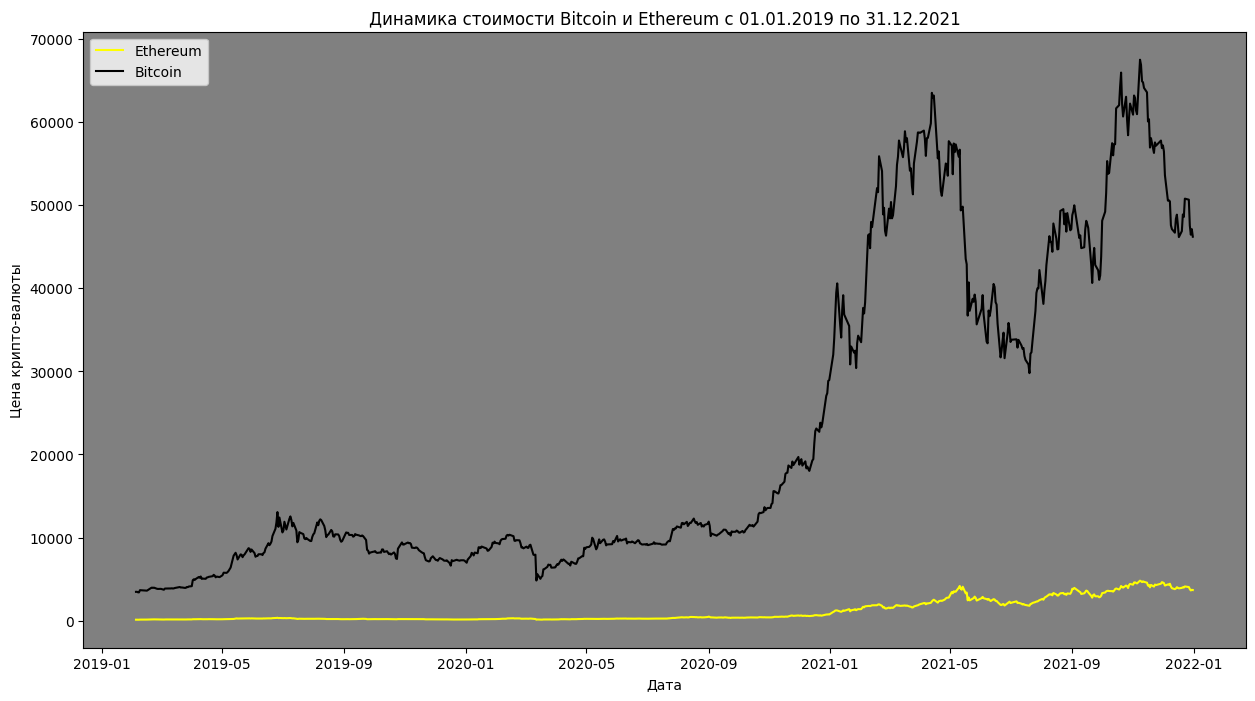

In [212]:
#построение графика
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(filter_data.index, filter_data['Ethereum_Price'], label='Ethereum', color='yellow')
plt.plot(filter_data.index, filter_data['Bitcoin_Price'], label='Bitcoin', color='black')
plt.title('Динамика стоимости Bitcoin и Ethereum c 01.01.2019 по 31.12.2021')
plt.xlabel('Дата')
plt.ylabel('Цена крипто-валюты')
plt.legend()
plt.show()

### Задание 2
Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019–2024 гг. (Natural Gas, Crude Oil, Copper, Platinum, Gold). Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

In [213]:
#преобразование в числовой тип данных  цены
if stock_market['Natural_Gas_Price'].dtype == 'object':
    stock_market['Natural_Gas_Price'] = stock_market['Natural_Gas_Price'].str.replace(',', '').astype(float)
if stock_market['Crude_oil_Price'].dtype == 'object':
    stock_market['Crude_oil_Price'] = stock_market['Crude_oil_Price'].str.replace(',', '').astype(float)
if stock_market['Copper_Price'].dtype == 'object':
    stock_market['Copper_Price'] = stock_market['Copper_Price'].str.replace(',', '').astype(float)
if stock_market['Platinum_Price'].dtype == 'object':
    stock_market['Platinum_Price'] = stock_market['Platinum_Price'].str.replace(',', '').astype(float)
if stock_market['Gold_Price'].dtype == 'object':
    stock_market['Gold_Price'] = stock_market['Gold_Price'].str.replace(',', '').astype(float)

In [214]:
#Установка фильтра по дате
filter_data=stock_market.index[stock_market.index > pd.to_datetime('2019-02-04')].min()
price = stock_market.loc[filter_data, ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']]
attitude = stock_market[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].divide(price)

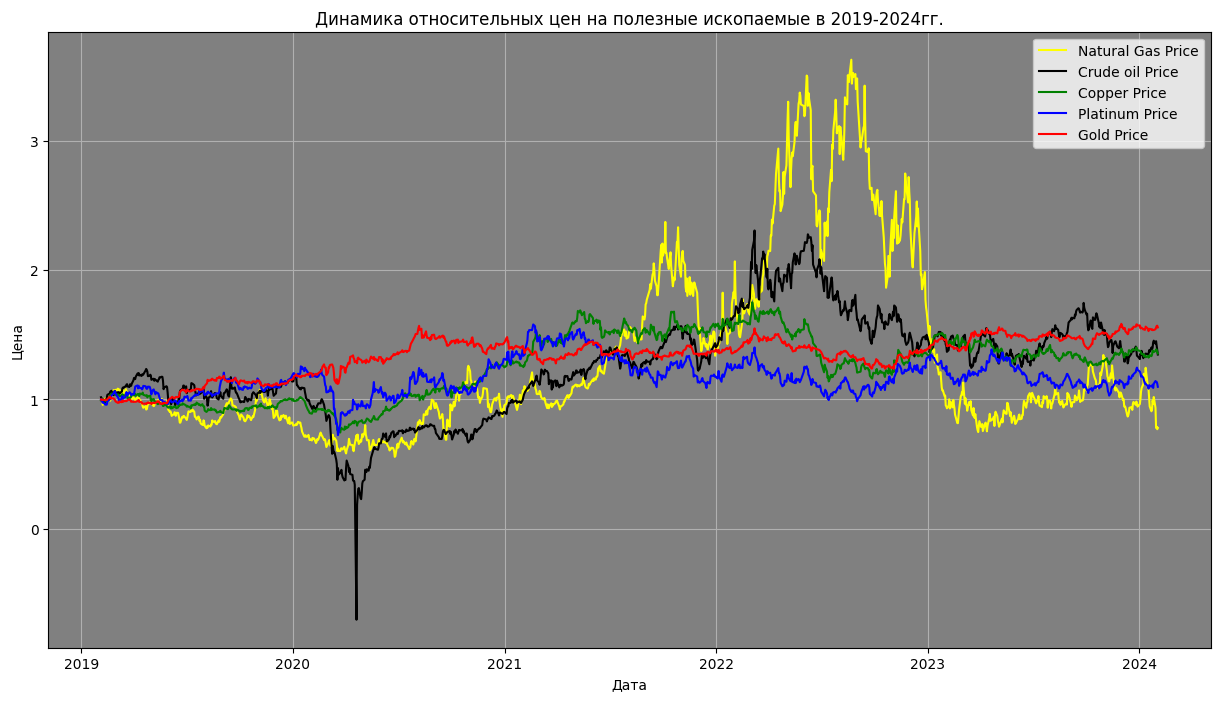

In [215]:
#построение графика
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor("gray")
plt.plot(attitude.index, attitude['Natural_Gas_Price'], label='Natural_Gas_Price'.replace('_', ' '),color='yellow')
plt.plot(attitude.index, attitude['Crude_oil_Price'], label='Crude_oil_Price'.replace('_', ' '),color='black')
plt.plot(attitude.index, attitude['Copper_Price'], label='Copper_Price'.replace('_', ' '),color='green')
plt.plot(attitude.index, attitude['Platinum_Price'], label='Platinum_Price'.replace('_', ' '),color='blue')
plt.plot(attitude.index, attitude['Gold_Price'], label='Gold_Price'.replace('_', ' '),color='red')
plt.title('Динамика относительных цен на полезные ископаемые в 2019-2024гг.')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3
Среди всех IT-компаний явно выделяются пять наиболее крупных. Они объединены аббревиатурой FAANG — Meta (Former Facebook), Amazon, Apple, Netflix, Google. Многие программисты мечтают попасть именно в эти компании, а инвесторы пристально следят за их деятельностью. Давайте узнаем, насколько это оправданно.

In [216]:
stock_market.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-04,2.660,116490.0,54.56,622470.0,2.7975,490.0,3462.8,503920.0,822.50,NaN,...,"3,12,000",310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0,1319.3,159560.0
2019-02-05,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,NaN,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.0
2019-02-06,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.10,NaN,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.0
2019-02-07,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.80,NaN,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.0
2019-02-08,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.20,NaN,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.0


In [217]:
#преобразование в числовой тип данных  цены
if stock_market['Meta_Price'].dtype == 'object':
    stock_market['Meta_Price'] = stock_market['Meta_Price'].str.replace(',', '').astype(float)
if stock_market['Amazon_Price'].dtype == 'object':
    stock_market['Amazon_Price'] = stock_market['Amazon_Price'].str.replace(',', '').astype(float)
if stock_market['Apple_Price'].dtype == 'object':
    stock_market['Apple_Price'] = stock_market['Apple_Price'].str.replace(',', '').astype(float)
if stock_market['Netflix_Price'].dtype == 'object':
    stock_market['Netflix_Price'] = stock_market['Netflix_Price'].str.replace(',', '').astype(float)
if stock_market['Google_Price'].dtype == 'object':
    stock_market['Google_Price'] = stock_market['Google_Price'].str.replace(',', '').astype(float)

### Задание 3.1
Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата pandas.Series и возвращать сумму этих серий.

### Задание 3.2
Аналогично заданию 3.1 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные — как соотношение).

Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года.
Нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего, а те компании, которые росли медленнее, — в оттенки красного.
Добавьте легенду и остальные аттрибуты.

### Задание 3.3
Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

Создайте линейный график с двумя линиями. Первая линия отвечает за полезные ископаемые.
Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение равно 1.1.
Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.
Проделайте аналогичную процедуру для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.
На основании полученных результатов ответьте на вопрос: во что лучше инвестировать — в полезные ископаемые или акции компаний?

### Задание 4
Попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

### Задание 4.1
С помощью библиотек matplotlib и seaborn создайте поле (plt.subplots()), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.

### Задание 4.2
С помощью библиотеки plotly создайте lineplot, в котором будет изображена динамика акций компаний за период с 2019 по 2024 гг. Добавьте на график кнопки для каждой компании, нажав на которые можно переключиться между визуализациями динамики изменения стоимости акций для разных компаний. Добавьте название и подписи к осям каждого графика.

### Задание 5
Напишите функцию, которая будет принимать на вход название компании, с помощью этого названия строить scatter plot с зависимостью цены (Price) акций от оборота (Volume) компании.
На каждый scatter plot добавьте линию линейной регрессии, которая будет показывать получившуюся зависимость. Получившуюся линию покрасьте в красный цвет.
Также на scatter plot добавьте текст с получившимся уравнением (вида  ).
Постройте поле (plt.subplots()), в котором будут изображены диаграммы рассеяния для всех компаний, присутствующих в датасете (используйте метод .pipe()). Каждая диаграмма рассеяния должна представлять собой зависимость цен на акции от выручки, иметь линию регрессии, а также текст с регрессионным уравнением для конкретной компании.